In [100]:
# Standard Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

<h1>Part 1 - Collecting and Cleaning Data for the Model</h1>

In [4]:
# Full Data Set can be downloaded here 
# https://insights.stackoverflow.com/survey

df = pd.read_csv('survey_results_public.csv')

In [10]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [31]:
# For this simple analysis, we just want to look at a few of the key and most populated factors
data = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
data = data.rename({'ConvertedCompYearly':'Salary', 'EdLevel':'Education', 'YearsCodePro':'Experience'}, axis=1)
data.head()

,Country,Education,Experience,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     83439 non-null  object 
 1   Education   83126 non-null  object 
 2   Experience  61216 non-null  object 
 3   Employment  83323 non-null  object 
 4   Salary      46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.2+ MB


<h3>Missing Values</h3>

In [33]:
# Missing data for all countries
missing_vals = data.isnull().sum() / len(data) * 100
missing_vals = missing_vals.sort_values()
missing_vals

Country        0.000000
Employment     0.139024
Education      0.375124
Experience    26.633828
Salary        43.858388
dtype: float64

In [ ]:
# Create a unique list of countries for selectbox list
countries = data['Country'].unique()
countries = np.sort(countries.tolist())
countries

In [16]:
# use to default Country Selection to USA
def_idx = np.where(countries == 'United States of America')
int(def_idx[0])

173

In [35]:
# We only want to use entries where we have a valid predictor label, in this case Salary
data = data[data['Salary'].notnull()]

# Now check the new number of missing values
missing_vals = data.isnull().sum() / len(data) * 100
missing_vals = missing_vals.sort_values()
missing_vals



Country       0.000000
Salary        0.000000
Employment    0.027752
Education     0.044830
Experience    0.967040
dtype: float64

In [36]:
# We are missing a small % of values for Employment, Education, and Experience but small enough to drop in this analysis
data = data.dropna()

# Now check the new number of missing values - should be zero
missing_vals = data.isnull().sum() / len(data) * 100
missing_vals = missing_vals.sort_values()
missing_vals

Country       0.0
Education     0.0
Experience    0.0
Employment    0.0
Salary        0.0
dtype: float64

In [37]:
# We also want to only look at full-time employed Developer salaries to have a level field for prediction
data = data[data['Employment']=='Employed full-time']
data = data.drop('Employment', axis=1)

<h3>Feature Cleaning</h3>

In [38]:
data['Country'].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [39]:
# Function to group data['Country'] to Other if too small
def group_small_countries(catg, cutoff):
    catg_map = {}
    for i in range(len(catg)):
        if catg.values[i] >= cutoff:
            catg_map[catg.index[i]] = catg.index[i]
        else:
            catg_map[catg.index[i]] = 'Other'
    return catg_map

In [41]:
print('Countries 90th percentile:', np.percentile(data['Country'].value_counts(),[75, 85, 90, 95, 99]))

Countries 90th percentile: [ 156.    312.75  413.5   832.5  2974.2 ]


In [42]:
# Choosing to group at just below the 90th percentile 
country_map = group_small_countries(data['Country'].value_counts(), 400)
data['Country'] = data['Country'].map(country_map)
data['Country'].value_counts()



Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

<h3>Outliers</h3>

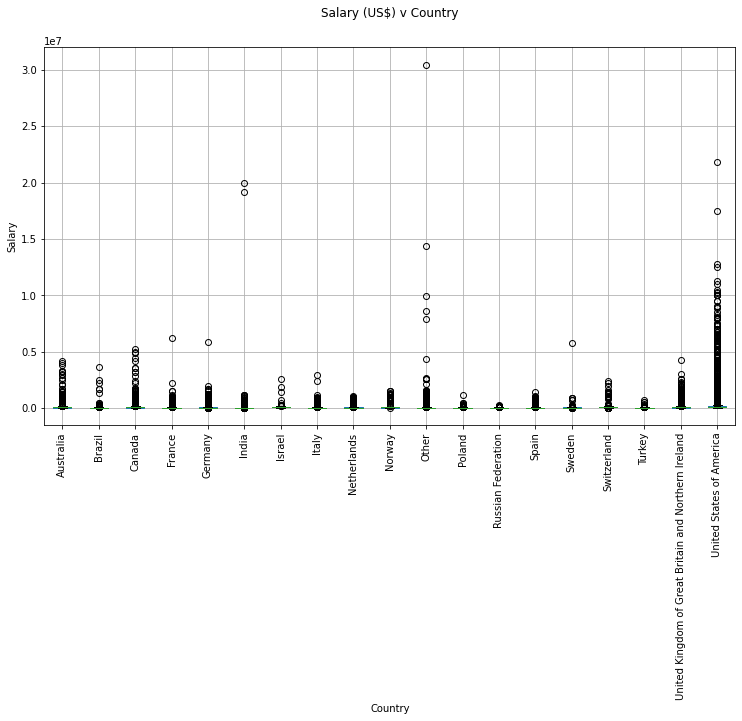

In [43]:
# We have a lot of outliers based on the below boxplot
fig, ax = plt.subplots(1,1, figsize=(12, 7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [44]:
print('Pct of Salaries > 250,000: ',len(data[data["Salary"] > 250000]) / len(data['Salary']))
print('Pct of Salaries < 10,000: ', len(data[data['Salary'] < 10000]) / len(data['Salary']))
print('Pct of Salaries with Country = Other: ', len(data[data['Country'] == 'Other']) / len(data['Country']))

Pct of Salaries > 250,000:  0.047474571634627344
Pct of Salaries < 10,000:  0.07749123374201089
Pct of Salaries with Country = Other:  0.26671806222178013


In [45]:
# We will drop the entries with outlier salaries (> 250,000 and < 10,000) as well as countries with unreliable sample sizes (country = Other)
data = data[data["Salary"] <= 250000]
data = data[data["Salary"] >= 10000]
data = data[data['Country'] != 'Other']

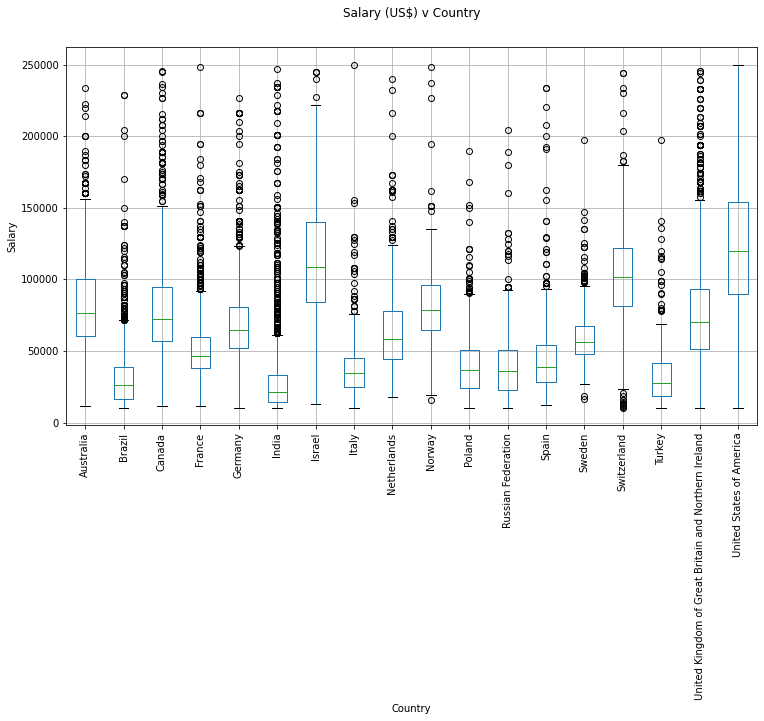

In [46]:
# We still have some noise outside the IQR but looks much better and model will have better predictions
fig, ax = plt.subplots(1,1, figsize=(12, 7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

<h3> More Feature Cleaning </h3>

In [48]:
# Function to clean up the Years of Experience column
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    elif x == 'Less than 1 year':
        return 0.5
    else:
        return float(x)

# Function to clean up the Level of Education column
def clean_edu(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor'
    if 'Master’s degree' in x:
        return 'Master'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post Grad'
    return 'No College'

In [49]:
data['Experience'] = data['Experience'].apply(clean_experience)

data['Experience'].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5,  3. , 15. ,
       12. ,  8. , 17. ,  1. , 14. , 26. , 34. , 11. , 25. , 24. , 22. ,
       13. ,  9. ,  7. , 39. , 20. , 27. , 23. , 30. , 19. , 35. , 33. ,
       37. , 43. , 40. , 29. , 38. , 31. , 42. , 28. , 46. , 32. , 36. ,
       47. , 45. , 44. , 41. , 50. , 49. , 48. ])

In [50]:
data['Education'] = data['Education'].apply(clean_edu)

data['Education'].unique()


array(['Master', 'Bachelor', 'Post Grad', 'No College'], dtype=object)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26230 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     26230 non-null  object 
 1   Education   26230 non-null  object 
 2   Experience  26230 non-null  float64
 3   Salary      26230 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.0+ MB


<AxesSubplot:xlabel='Experience', ylabel='Salary'>

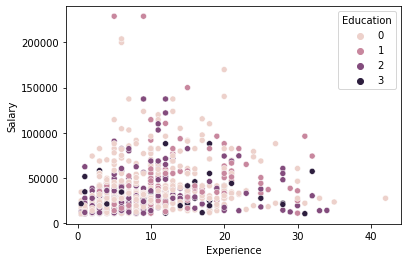

In [108]:
# Scatter plot of the salary distribution by years Experience for the United States
us_data = data[data['Country']==1]
sns.scatterplot(x='Experience', y='Salary', data=us_data, hue='Education')

In [53]:
# Optional - save data to csv and upload in Regression Toolkit streamlit app directly

data.to_csv('/Users/zackmalone/Documents/Projects_2021/Streamlit_Projects/stackoverflow_df_final.csv', index=False)

<h1>Part 2 - Using the Data in our Regression Model</h1>

<h3>Encoding Categorical Variables</h3>

In [54]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
data['Education'] = le_education.fit_transform(data['Education'])
data['Education'].unique()

# 0 - Bachelors
# 1 - Master
# 2 - No College
# 3 - Post Grad

array([1, 0, 3, 2])

In [55]:
le_country = LabelEncoder()

data['Country'] = le_country.fit_transform(data['Country'])
data['Country'].unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  0,  5,
        9])

In [56]:
X = data.drop('Salary', axis=1)
y = data['Salary']

In [57]:
X

,Country,Education,Experience
9,13,1,4.0
11,12,0,5.0
12,4,1,6.0
16,15,0,2.0
17,2,0,6.0
...,...,...,...
83430,17,1,21.0
83432,2,0,0.5
83434,17,0,5.0
83436,17,2,4.0


In [58]:
y

9         51552.0
11        46482.0
12        77290.0
16        17748.0
17        46135.0
           ...   
83430    125000.0
83432     80169.0
83434    160500.0
83436     90000.0
83438     21168.0
Name: Salary, Length: 26230, dtype: float64

<h3>Splitting the data into Train and Test set</h3>

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


<h2>Model 1 - Linear Regression</h1>

In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

# Error Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('RMSE: ', rmse)
print('R-Squared: ', r2)



RMSE:  42062.048259231946
R-Squared:  0.31650831462109275


<h2>Model 2 - Decision Tree Regression</h2>

In [62]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=101)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

# Error Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('RMSE: ', rmse)
print('R-Squared: ', r2)


RMSE:  34204.719704307485
R-Squared:  0.5480145308940538


<h2>Model 3 - Random Forest Regression</h2>

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=101)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

# Error Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('RMSE: ', rmse)
print('R-Squared: ', r2)

RMSE:  33738.18277731964
R-Squared:  0.5602602000341519


It looks like Random Forest performs slightly better than Decision Tree without any performance tuning. 

We can perform a Grid Search to find the optimal parameters for both Decision Tree and the Random Forest

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Decision Tree Grid Search

max_depth = [None, 2, 4, 6, 8, 10, 12]
params = {'max_depth': max_depth}

regressor = DecisionTreeRegressor(random_state=101)
gs = GridSearchCV(regressor, param_grid=params,scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

print('The best parameters are: ', gs.best_estimator_)

The best parameters are:  DecisionTreeRegressor(max_depth=10, random_state=101)


In [66]:
# New prediction after Grid Search

regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Error Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('New RMSE: ', rmse)
print('New R-Squared: ', r2)

New RMSE:  33483.90563925181
New R-Squared:  0.5668636625448675


In [70]:
# Random Forest Grid Search

max_depth = [None, 2, 4, 6, 8, 10, 12]
n_estimators = [100, 200, 300, 400, 500]
params = {'max_depth': max_depth, 'n_estimators': n_estimators}

regressor = RandomForestRegressor(random_state=101)
gs = GridSearchCV(regressor, param_grid=params,scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

print('The best parameters are: ', gs.best_estimator_)

The best parameters are:  RandomForestRegressor(max_depth=10, n_estimators=500, random_state=101)


In [71]:
# New prediction after Grid Search

regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Error Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('New RMSE: ', rmse)
print('New R-Squared: ', r2)

New RMSE:  33107.59276315672
New R-Squared:  0.5765446635888178


<h3>Model Selection?</h3>

After performing grid search on both the Decision Tree and Random Forest Regression models, the RF only performs slightly better than the Decision tree but at the cost of more time and computing power, so we will just use the Decision Tree model.

In [91]:
model = DecisionTreeRegressor(max_depth=10, random_state=101)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Error Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('New RMSE: ', rmse)
print('New R-Squared: ', r2)


New RMSE:  33483.90563925181
New R-Squared:  0.5668636625448675


In [101]:
# New array for predictions
Z = np.array([['United States of America', 'Master', 15]])
Z[:, 0] = le_country.transform(Z[:,0])
Z[:, 1] = le_education.transform(Z[:, 1])
Z = Z.astype(float)
Z
    

array([[17.,  1., 15.]])

In [102]:
# Predictions

new_pred = model.predict(Z)

print('The predicted salary for someone from the United States with a Master`s degree and 15 years of experience is:')
print(new_pred)

The predicted salary for someone from the United States with a Master`s degree and 15 years of experience is:
[146945.66129032]


The model as it stands is returning "reasonable" results, adding polynomial features and introudcing L1 and L2 penalties with Lasso and Ridge regularization still had poorer results than the Decision Tree and Random Forest regressors so we will stick with our current model!

<h1>Part 3 - Saving the Model and Creating the Web App in Streamlit</h1>

In [115]:
import pickle

data_2 = {'model': model, 'le_country': le_country, 'le_education': le_education}
with open('saved_steps.pk', 'wb') as file:
    pickle.dump(data_2, file) 

In [116]:
with open('saved_steps.pk', 'rb') as file:
    data_2 = pickle.load(file)

model = data_2['model']
le_country = data_2['le_country']
le_education = data_2['le_education']

In [117]:
y_pred = model.predict(X_test)
y_pred

array([ 72061.5       ,  44268.68308351, 128963.25595238, ...,
       140364.3772242 , 142466.14583333,  44268.68308351])